# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [2]:
!pip3 install --upgrade pip
!python --version

Defaulting to user installation because normal site-packages is not writeable
Python 3.11.9


In [5]:
#%pip install refinitiv-dataplatform
#%pip install matplotlib
#%pip install seaborn

In [1]:
import refinitiv.dataplatform as rdp
import pandas
%run ../credentials.ipynb

In [2]:
session = rdp.open_platform_session(
    APP_KEY,
    rdp.GrantPassword(
        username = RDP_LOGIN,
        password = RDP_PASSWORD
    )
)

In [3]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x7f484ac064c0 {name='codebook'}>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [11]:
%matplotlib inline
plt.style.use('seaborn-v0_8-dark-palette')
warnings.filterwarnings('ignore')

### Numpy

In [12]:
# Python program to demonstrate
# basic array characteristics
import numpy as np
 
# Creating array object
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
 
# Printing type of arr object
print("Array is of type: ", type(arr))
 
# Printing array dimensions (axes)
print("No. of dimensions: ", arr.ndim)
 
# Printing shape of array
print("Shape of array: ", arr.shape)
 
# Printing size (total number of elements) of array
print("Size of array: ", arr.size)
 
# Printing type of elements in array
print("Array stores elements of type: ", arr.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (2, 3)
Size of array:  6
Array stores elements of type:  int64


## Python Pandas

In [13]:
import pandas as pd 

data = {
  "sesion": [420, 380, 390],
  "asistencia": [25, 20, 27]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

df

,sesion,asistencia
0,420,25
1,380,20
2,390,27


In [14]:
#utilización de índice:
print(df.loc[2])

sesion        390
asistencia     27
Name: 2, dtype: int64


In [15]:
df = pd.DataFrame(data, index = ["dia1", "dia2", "dia3"])
df 

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


# Refinitiv Python

# Extracción de datos estructurados

Las funciones básicas para extraer datos de eikon son las siguiente:
- get_symbology
- get_data
- get_timeseries

get_symbology(symbol, from_symbol_type='RIC', to_symbol_type=None, raw_output=False, debug=False, bestMatch=True)
Devuelve una lista de nombre de instrumentos convertiods en el código del intrumento.

get_data(instruments, fields, parameters=None, field_name=False, raw_output=False, debug=False)
Devuelve un dataframe de pandas con campos en columnas e intrumentos como índice de renglones.

get_timeseries(rics, fields='*', start_date=None, end_date=None, interval='daily', count=None, calendar=None, corax=None, normalize=False, raw_output=False, debug=False)
Devuelve series históricas de uno o varios RICs.
<br>
Referencia: https://docs-developers.refinitiv.com/1594387995587/14684/book/en/eikon/index.html
RICs Reuters instrument code

# Obtener datos

In [69]:
data = rdp.get_data(["SPOT.K", "IBM", "GOOG.O", "MSFT.O"], ["TR.PriceClose", "TR.Volume", "TR.PriceLow", "TR.TotalReturnYTD"])

In [70]:
data

,instrument,TR.PriceClose,TR.Volume,TR.PriceLow,YTD Total Return
0,SPOT.K,340.36,918955,336.51,81.1292640081666
1,IBM,189.48,2290421,189.0001,19.1016840561948
2,GOOG.O,163.95,12434969,163.55,16.4660769855608
3,MSFT.O,406.81,16762883,404.2434,8.57290985561807


In [71]:
type(data)

pandas.core.frame.DataFrame

In [72]:
data.index

RangeIndex(start=0, stop=4, step=1)

# Obtener datos de un índice

In [73]:
dax = rdp.get_data('0#.GDAXI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])

In [74]:
dax.dtypes

instrument          string[python]
TR.CommonName       string[python]
TR.PriceClose       string[python]
TR.Volume           string[python]
YTD Total Return    string[python]
dtype: object

In [75]:
dax['TR.PriceClose'] = dax['TR.PriceClose'].astype(float)
dax['TR.Volume'] = dax['TR.Volume'].astype(int)
dax['YTD Total Return'] = dax['YTD Total Return'].astype(float)

In [76]:
dax2 = dax.set_index('instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]

In [77]:
dax2.dtypes

YTD_Total_Return    float64
dtype: object

In [78]:
dax2.sort_values(by=['YTD_Total_Return'])

,YTD_Total_Return
instrument,
SATG_p.DE,-27.490774
BAYGn.DE,-22.499253
BNRGn.DE,-20.837128
CONG.DE,-20.717352
IFXGn.DE,-19.050326
RWEG.DE,-18.991301
BMWG.DE,-16.756589
DHLn.DE,-15.783306
P911_p.DE,-15.217242


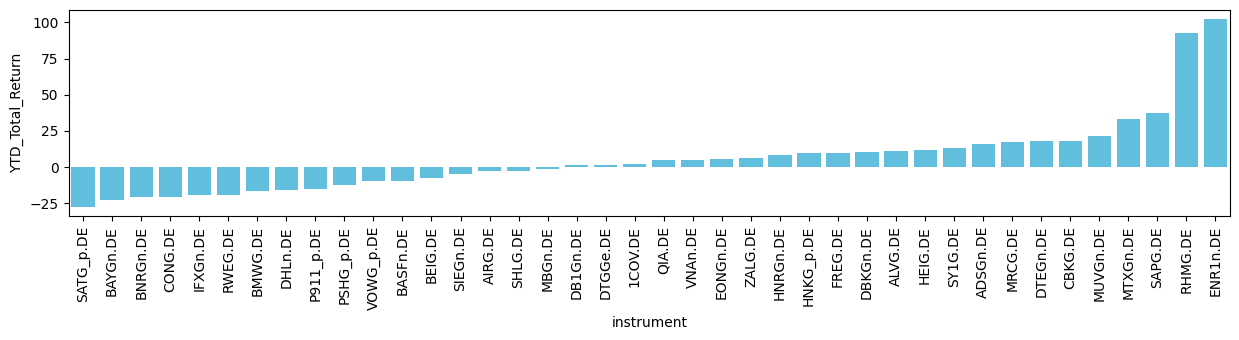

In [79]:
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

dax2 = dax.set_index('instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]

bar_plot = sns.barplot(x=dax2.index, y=dax2['YTD_Total_Return'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [80]:
type(dax2)

pandas.core.frame.DataFrame

### Generen grafico para volumen de menor a mayor DJI

In [81]:
lp4 = rdp.get_data('LP40065886', ['TR.FundHoldingRIC','TR.FundHoldingName',
                           'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares',
                           'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})

In [82]:
lp4

In [83]:
XLE= rdp.get_data('XLE', ['TR.FundHoldingRIC','TR.FundHoldingName', 'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares', 'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})

In [84]:
XLE

In [85]:
XLE.columns = [c.replace(' ', '_') for c in XLE.columns]
list_values = ['USD CASH', 'OTHER ASSETS LESS LIABILITIES']
XLE[~XLE['Holding_Name'].isin(list_values)]

AttributeError: 'NoneType' object has no attribute 'columns'

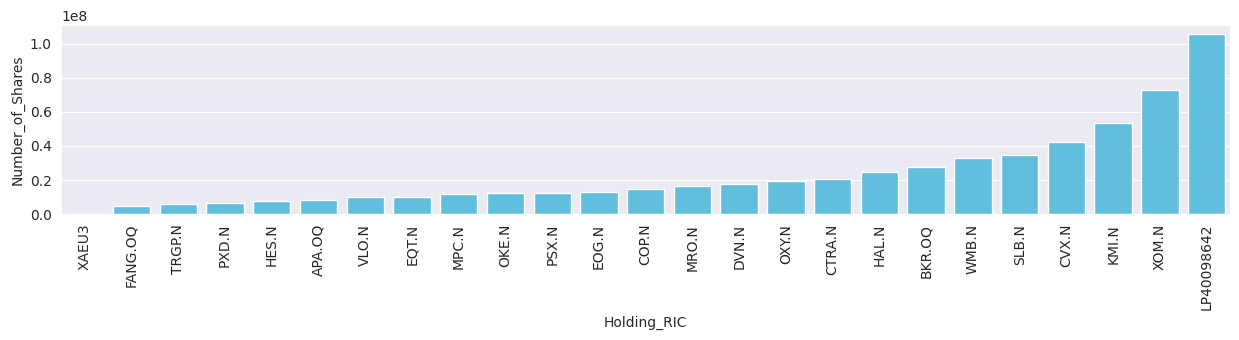

In [55]:
XLE2 = XLE[~XLE['Holding_Name'].isin(list_values)].set_index('Holding_RIC')['Number_of_Shares'].sort_values().to_frame()
type(XLE2)
bar_plot = sns.barplot(x=XLE2.index, y=XLE2['Number_of_Shares'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [57]:
help(rd.get_data)

Help on function get_data in module refinitiv.data._fin_coder_layer.get_data_func:

get_data(universe: Union[str, Iterable[str]], fields: Union[str, Iterable[str], NoneType] = None, parameters: Union[str, dict, NoneType] = None, use_field_names_in_headers: bool = False) -> pandas.core.frame.DataFrame
    Retrieves pricing snapshots, as well as Fundamental and Reference data.
    
    Parameters
    ----------
    universe: str | list
        Instruments to request
    fields: str | list, optional
        Fields to request
    parameters: str | dict, optional
        Single key=value global parameter or dictionary of global parameters to request
    use_field_names_in_headers: bool, default False
        If True - returns field name as column headers for data instead of title
    
    Returns
    -------
    pandas.DataFrame
    
    Examples
    --------
    >>> get_data(universe=['IBM.N', 'VOD.L'], fields=['BID', 'ASK'])
    >>> get_data(
    ...     universe=['GOOG.O', 'AAPL.O'],
   

# Descargar series de tiempo

In [59]:
#help(rd.get_timeseries)

In [70]:
df_ts = rd.get_history(universe=["000001.SZ"], fields=["BID", "ASK"], interval="1D",
               start = "2016-06-13", end = "2016-06-20")

In [71]:
df_ts

000001.SZ,BID,ASK
Date,,
2016-06-14,8.65833,8.666663
2016-06-15,8.699997,8.70833
2016-06-16,8.57,8.58
2016-06-17,8.57,8.58
2016-06-20,8.59,8.6


In [72]:
import datetime as dt
today = dt.date.today()
d = today - dt.timedelta(days=100)
print(today, d)

2023-08-18 2023-05-10


In [75]:
df_ts = rd.get_history(universe=["000001.SZ"], fields=["BID", "ASK"], interval="1D",
               start = d, end = today)
df_ts

000001.SZ,BID,ASK
Date,,
2023-05-11,12.84,12.85
2023-05-12,12.62,12.63
2023-05-15,12.82,12.83
2023-05-16,12.61,12.62
2023-05-17,12.49,12.5
...,...,...
2023-08-14,11.67,11.68
2023-08-15,11.73,11.74
2023-08-16,11.72,11.73


# Estadística Básica

In [77]:
dax_corto = dax['Instrument'][0:10].tolist()
dax_corto

['BASFn.DE',
 'IFXGn.DE',
 'SIEGn.DE',
 'EONGn.DE',
 'DBKGn.DE',
 'SATG_p.DE',
 'SAPG.DE',
 'BAYGn.DE',
 'RWEG.DE',
 '1COV.DE']

In [78]:
today = dt.datetime.today()
d = today - dt.timedelta(days=100)
print(today, d)

2023-08-18 22:44:46.262046 2023-05-10 22:44:46.262046


In [82]:
df_ts = rd.get_history(universe=dax_corto, fields=["BID"], interval="1D",
               start = d, end = today)
df_ts

BID,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,1COV.DE
Date,,,,,,,,,,
2023-05-11,47.07,33.2,148.84,11.965,9.569,348.1,122.44,54.1,41.78,39.4
2023-05-12,47.13,33.68,149.96,12.04,9.614,342.1,121.08,53.89,42.35,39.02
2023-05-15,47.775,33.49,150.46,12.035,9.713,340.0,120.22,53.24,42.46,39.39
2023-05-16,47.105,34.185,149.74,12.015,9.611,337.2,121.34,53.77,42.31,39.01
2023-05-17,46.98,34.405,153.02,11.875,9.693,329.6,122.16,53.84,41.83,39.95
...,...,...,...,...,...,...,...,...,...,...
2023-08-14,46.38,33.355,138.5,11.185,9.969,364.9,127.14,52.71,39.09,48.28
2023-08-15,45.72,32.89,137.92,10.975,9.922,368.9,126.22,51.88,38.75,48.16
2023-08-16,45.665,32.93,137.94,10.985,9.893,369.2,127.0,50.94,38.83,48.3


In [83]:
df_ts.describe()

BID,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,1COV.DE
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,46.091042,36.034931,151.943611,11.377639,9.747778,334.350000,123.430556,51.843611,39.666111,44.606806
std,1.593983,1.915250,7.324171,0.246649,0.291296,22.234588,2.183965,1.390182,0.985447,4.499407
min,42.335000,31.970000,134.320000,10.935000,9.081000,292.700000,119.200000,48.640000,38.130000,35.950000
25%,45.277500,34.506250,148.500000,11.226250,9.571250,315.475000,121.945000,50.660000,39.027500,39.625000
50%,46.462500,36.102500,151.730000,11.360000,9.757000,333.650000,123.220000,51.850000,39.480000,47.100000
75%,47.146250,37.445000,157.585000,11.495000,9.923750,354.475000,124.655000,52.617500,40.070000,48.255000
max,49.410000,39.995000,166.220000,12.040000,10.558000,373.700000,128.760000,54.630000,42.460000,50.840000


In [84]:
correlacion = df_ts[dax_corto].corr()
print(correlacion)

BID        BASFn.DE  IFXGn.DE  SIEGn.DE  EONGn.DE  DBKGn.DE  SATG_p.DE  \
BID                                                                      
BASFn.DE   1.000000  0.072971 -0.052438  0.052896  0.769803   0.683035   
IFXGn.DE   0.072971  1.000000  0.533670  0.235889  0.070199  -0.141399   
SIEGn.DE  -0.052438  0.533670  1.000000  0.160043 -0.146010  -0.300764   
EONGn.DE   0.052896  0.235889  0.160043  1.000000 -0.081092  -0.186810   
DBKGn.DE   0.769803  0.070199 -0.146010 -0.081092  1.000000   0.719336   
SATG_p.DE  0.683035 -0.141399 -0.300764 -0.186810  0.719336   1.000000   
SAPG.DE    0.013676  0.307736 -0.047956 -0.199737  0.030974  -0.012189   
BAYGn.DE   0.612403 -0.266999  0.228566  0.066391  0.372451   0.374483   
RWEG.DE    0.027759  0.005774  0.360137  0.736794 -0.129090  -0.167026   
1COV.DE   -0.139773  0.231748 -0.488482 -0.063839  0.142946   0.118000   

BID         SAPG.DE  BAYGn.DE   RWEG.DE   1COV.DE  
BID                                                
BASFn.D

<AxesSubplot:xlabel='BID', ylabel='BID'>

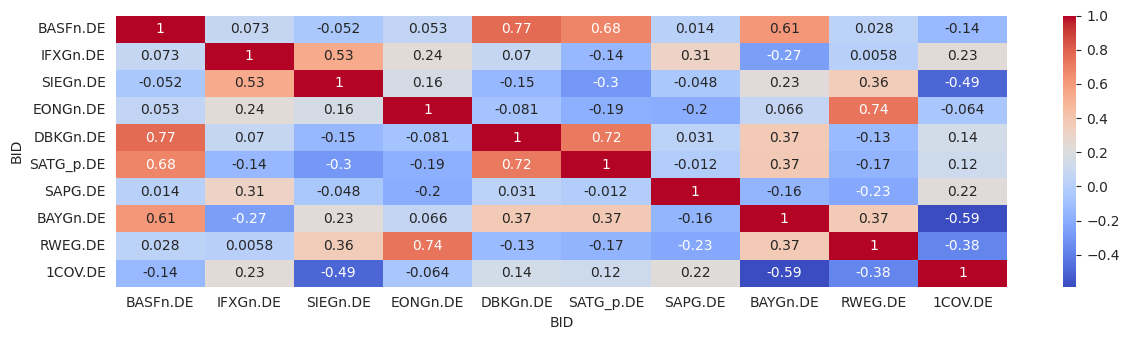

In [86]:
sns.heatmap(df_ts[dax_corto].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
Seleccionar un índice o fondo 
Calcular el rendimiento del fondo o índice 
- 1 año para atrás hoy y 
- lo van comparar a 2 años atrás a 1 año
Filtro de Clenow a los instrumuentos que son más dinámicos del periodo 2 años atrás a 1 año (2021 a 2022)
- rendimientos en el periodo de 1 año para atrás hoy (2022 a 2023)

Si se cumple o no la hipotésis que plantea Clenow

In [ ]:
https://developers.lseg.com/en/article-catalog/article/getting-start-with-refinitiv-data-platform